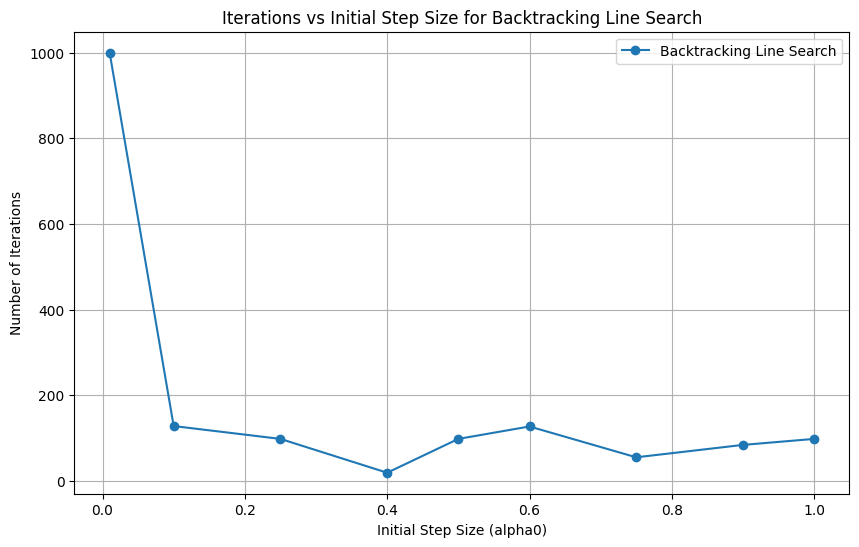

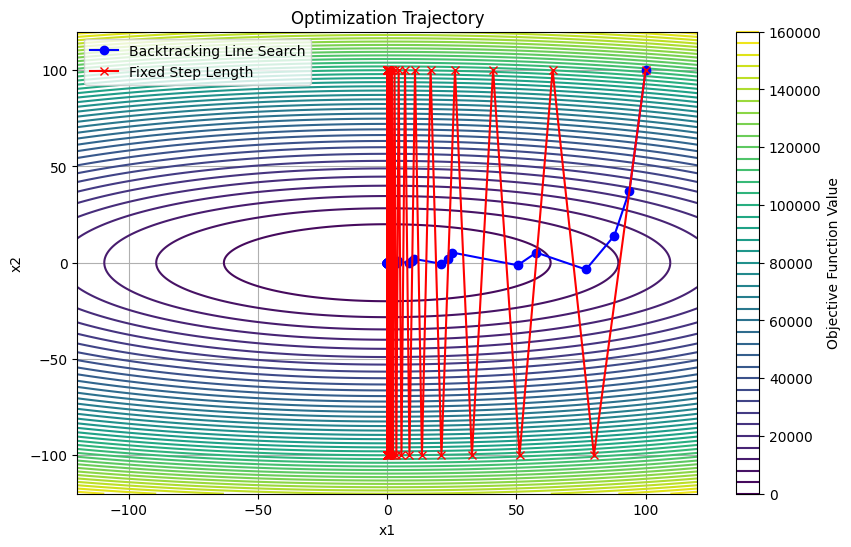

alpha0: 1.00, Final Minimizer: [2.83288424e-11 2.33884029e-12], Final Objective: 0.000000, Iterations: 98
alpha0: 0.90, Final Minimizer: [3.96865278e-11 5.93504944e-13], Final Objective: 0.000000, Iterations: 84
alpha0: 0.75, Final Minimizer: [1.73047105e-11 3.74110044e-13], Final Objective: 0.000000, Iterations: 55
alpha0: 0.60, Final Minimizer: [4.02619484e-11 1.42108547e-12], Final Objective: 0.000000, Iterations: 127
alpha0: 0.50, Final Minimizer: [2.83288424e-11 2.33884029e-12], Final Objective: 0.000000, Iterations: 98
alpha0: 0.40, Final Minimizer: [2.359296e-11 0.000000e+00], Final Objective: 0.000000, Iterations: 19
alpha0: 0.25, Final Minimizer: [2.83288424e-11 2.33884029e-12], Final Objective: 0.000000, Iterations: 98
alpha0: 0.10, Final Minimizer: [4.4327257e-11 0.0000000e+00], Final Objective: 0.000000, Iterations: 128
alpha0: 0.01, Final Minimizer: [1.68296736e-07 1.23023192e-95], Final Objective: 0.000000, Iterations: 1000


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(x) and its gradient
def g(x):
    return x[0]**2 + 10 * x[1]**2

def grad_g(x):
    return np.array([2 * x[0], 20 * x[1]])

# Gradient descent with backtracking line search
def gradient_descent_backtracking(x0, tau, alpha0, rho, gamma, max_iter=1000):
    x = x0
    iterations = 0
    while np.linalg.norm(grad_g(x)) > tau and iterations < max_iter:
        p = -grad_g(x)
        alpha = alpha0
        # Backtracking line search
        while g(x + alpha * p) > g(x) + gamma * alpha * np.dot(grad_g(x), p):
            alpha *= rho
        x = x + alpha * p
        iterations += 1
    return x, g(x), iterations

# Gradient descent with fixed step length
def gradient_descent_fixed_step(x0, tau, step_size, max_iter=1000):
    x = x0
    iterations = 0
    while np.linalg.norm(grad_g(x)) > tau and iterations < max_iter:
        x = x - step_size * grad_g(x)
        iterations += 1
    return x, g(x), iterations

# Parameters
x0 = np.array([100.0, 100.0])
tau = 1e-10
rho = 0.5
gamma = 0.5
alpha0_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

# Run experiments for backtracking line search
results = []
for alpha0 in alpha0_values:
    x_min, f_min, num_iter = gradient_descent_backtracking(x0, tau, alpha0, rho, gamma)
    results.append((alpha0, x_min, f_min, num_iter))

# Extract results for plotting
alpha0_list, _, _, iterations_list = zip(*results)

# Plot number of iterations vs alpha0
plt.figure(figsize=(10, 6))
plt.plot(alpha0_list, iterations_list, marker='o', label="Backtracking Line Search")
plt.xlabel("Initial Step Size (alpha0)")
plt.ylabel("Number of Iterations")
plt.title("Iterations vs Initial Step Size for Backtracking Line Search")
plt.grid()
plt.legend()
plt.show()

# Compare trajectory for backtracking and fixed step methods
# Generate level sets for g(x)
x1 = np.linspace(-120, 120, 400)
x2 = np.linspace(-120, 120, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = g([X1, X2])

plt.figure(figsize=(10, 6))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(label="Objective Function Value")

# Trajectory for backtracking line search
trajectory_backtracking = [x0]
x = x0
for _ in range(100):
    p = -grad_g(x)
    alpha = alpha0_values[0]
    while g(x + alpha * p) > g(x) + gamma * alpha * np.dot(grad_g(x), p):
        alpha *= rho
    x = x + alpha * p
    trajectory_backtracking.append(x)
trajectory_backtracking = np.array(trajectory_backtracking)
plt.plot(
    trajectory_backtracking[:, 0],
    trajectory_backtracking[:, 1],
    marker='o',
    label="Backtracking Line Search",
    color="blue",
)

# Trajectory for fixed step length
step_size = 0.1
trajectory_fixed_step = [x0]
x = x0
for _ in range(100):
    x = x - step_size * grad_g(x)
    trajectory_fixed_step.append(x)
trajectory_fixed_step = np.array(trajectory_fixed_step)
plt.plot(
    trajectory_fixed_step[:, 0],
    trajectory_fixed_step[:, 1],
    marker='x',
    label="Fixed Step Length",
    color="red",
)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Optimization Trajectory")
plt.legend()
plt.grid()
plt.show()

# Print observations
for alpha0, x_min, f_min, num_iter in results:
    print(f"alpha0: {alpha0:.2f}, Final Minimizer: {x_min}, Final Objective: {f_min:.6f}, Iterations: {num_iter}")
